<a href="https://colab.research.google.com/github/MohibShaikh/churn_predictor/blob/main/churn_predictor_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
dataset = pd.read_csv('/kaggle/input/customer-churn-dataset/customer_churn_dataset-training-master.csv')

In [43]:
dataset.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [45]:
dataset.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [46]:
dataset = dataset.drop(columns = ['CustomerID'])

In [47]:
# dataset['Contract Length'].unique()
# dataset['Subscription Type'].unique()
# dataset['Contract Length'].isna().sum()
# dataset['Subscription Type'].isna().sum()
# dataset['Gender'].isna().sum()

In [48]:
dataset = dataset.dropna()

In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage Frequency    440832 non-null  float64
 4   Support Calls      440832 non-null  float64
 5   Payment Delay      440832 non-null  float64
 6   Subscription Type  440832 non-null  object 
 7   Contract Length    440832 non-null  object 
 8   Total Spend        440832 non-null  float64
 9   Last Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(8), object(3)
memory usage: 40.4+ MB


In [50]:
dataset = pd.get_dummies(data=dataset,drop_first=True)
dataset = dataset.astype(int)

In [51]:
dataset

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,30,39,14,5,18,932,17,1,0,0,1,0,0
1,65,49,1,10,8,557,6,1,0,0,0,1,0
2,55,14,4,6,18,185,3,1,0,0,0,0,1
3,58,38,21,7,7,396,29,1,1,0,1,1,0
4,23,32,20,5,8,617,20,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,42,54,15,1,3,716,8,0,1,1,0,0,0
440829,25,8,13,1,20,745,2,0,0,1,0,0,0
440830,26,35,27,1,5,977,9,0,1,0,1,0,1
440831,28,55,14,2,0,602,2,0,1,0,1,0,1


<Axes: ylabel='Frequency'>

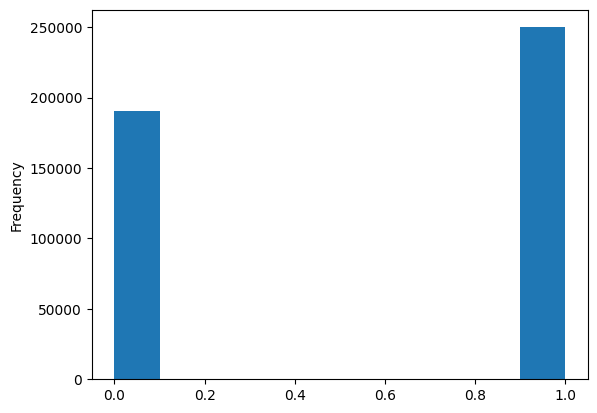

In [52]:
dataset.Churn.plot.hist()

In [53]:
(dataset.Churn==0).sum()

190833

In [54]:
dataset2=dataset.drop(columns=['Churn'])

<Axes: title={'center': 'Correlated With Churn Column'}>

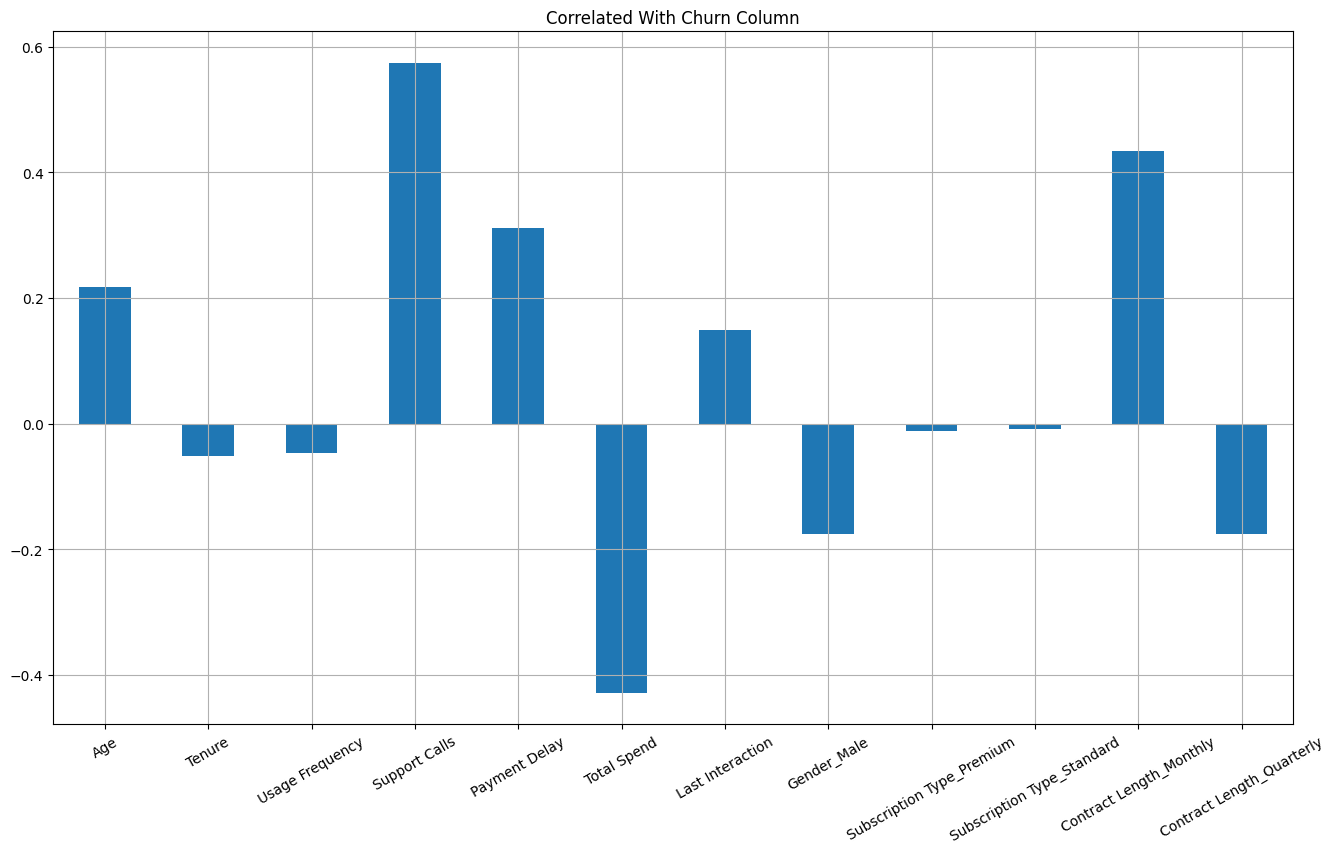

In [55]:
dataset2.corrwith(dataset['Churn']).plot.bar(figsize=(16,9),title='Correlated With Churn Column',rot=30,grid=True)

In [56]:
corr=dataset.corr()

<Axes: >

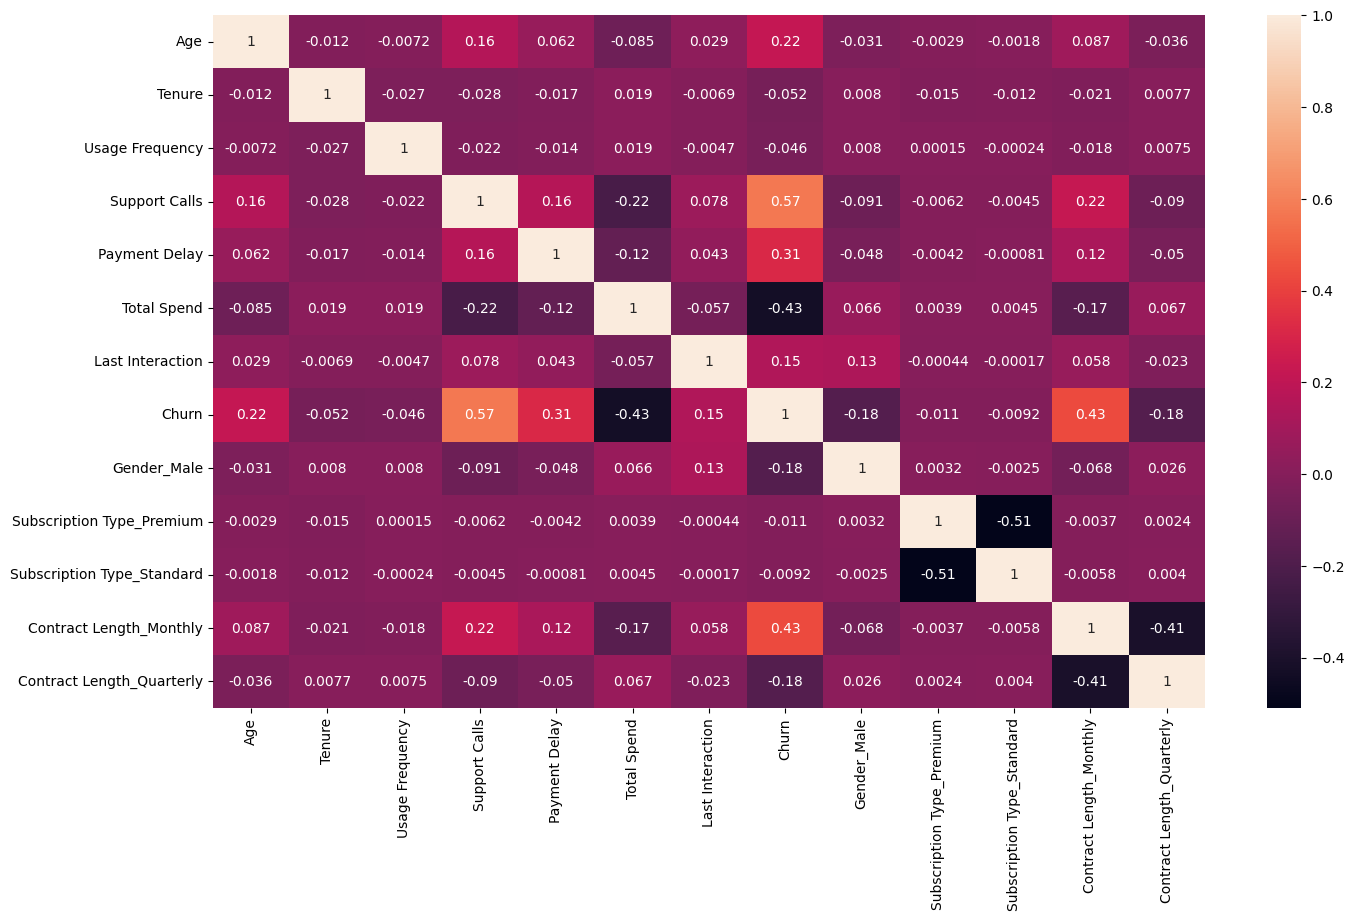

In [57]:
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

In [58]:
X = dataset.drop(columns=['Churn'])
y = dataset['Churn']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [60]:
X_test.shape

(88167, 12)

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()

In [63]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
X_train

array([[ 1.97729236,  1.43401791, -0.4433525 , ...,  1.39887018,
        -0.49664378,  1.22482446],
       [-1.71876247,  1.0283613 , -1.37520408, ..., -0.71486262,
        -0.49664378, -0.81644352],
       [ 1.17380218, -0.07270665, -0.4433525 , ...,  1.39887018,
        -0.49664378, -0.81644352],
       ...,
       [ 1.17380218, -0.76811799, -1.37520408, ...,  1.39887018,
        -0.49664378,  1.22482446],
       [-0.35282917,  0.85450846, -0.32687106, ..., -0.71486262,
        -0.49664378, -0.81644352],
       [-1.07597033,  0.62270468, -1.72464842, ...,  1.39887018,
        -0.49664378, -0.81644352]])

In [65]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=18).fit(X_train,y_train)

In [66]:
y_pred = clf.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score

In [68]:
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
ps = precision_score(y_test,y_pred)
rs = recall_score(y_test,y_pred)

In [69]:
results = pd.DataFrame([['Logistic Regression',acc,f1,ps,rs]],columns=['Model','Accuracy','F1_Score','Precision','Recall'])
results

,Model,Accuracy,F1_Score,Precision,Recall
0,Logistic Regression,0.894802,0.905153,0.925549,0.885636


In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
clf = GradientBoostingClassifier(random_state=18).fit(X_train,y_train)

In [72]:
y_pred = clf.predict(X_test)

In [73]:
acc1 = accuracy_score(y_test,y_pred)
f11 = f1_score(y_test,y_pred)
ps1 = precision_score(y_test,y_pred)
rs1 = recall_score(y_test,y_pred)

In [75]:
GBC = pd.DataFrame([['Gradient Boosting Classifier',acc1,f11,ps1,rs1]],columns=['Model','Accuracy','F1_Score','Precision','Recall'])
results._append(GBC,ignore_index=True)
results

,Model,Accuracy,F1_Score,Precision,Recall
0,Logistic Regression,0.894802,0.905153,0.925549,0.885636
